In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm

/Users/ttn/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [80]:
Olympics = pd.read_excel('./olympics_2012.xls')
Olympics.head(2)

,Year,Time
0,1896,273.2
1,1900,246.0


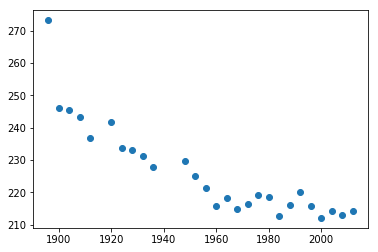

In [81]:
plt.scatter(Olympics['Year'], Olympics['Time'])
plt.show()

### Model without outlier

In [93]:
# Olympics_wo_outlier = 
y = Olympics[Olympics['Year'] != 1896]['Time']
X = Olympics[Olympics['Year'] != 1896]['Year']
X = sm.add_constant(X)
model_without_outlier = sm.OLS(y, X).fit()
model_without_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     166.2
Date:                Sun, 29 Jul 2018   Prob (F-statistic):           2.80e-12
Time:                        19:48:17   Log-Likelihood:                -72.204
No. Observations:                  26   AIC:                             148.4
Df Residuals:                      24   BIC:                             150.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        811.5357     45.551     17.816      0.000     717.524     905.548
Year          -0.2997      0.023    -12.891      0.000      -0.348      -0.252
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.002
Skew:                          -0.264   Prob(JB):                        0.606
Kurtosis:                       2.196   Cond. No.                     1.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

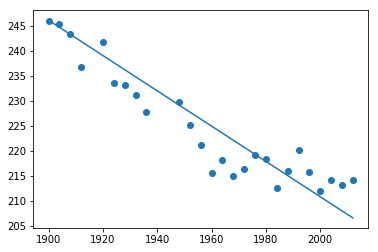

In [94]:

predictions = model_without_outlier.predict(X)
plt.scatter(Olympics[Olympics['Year'] != 1896]['Year'], Olympics[Olympics['Year'] != 1896]['Time'])
# plt.plot(X['Year'], predictions)
plt.plot(X['Year'], [ 916.4323 - 0.3528*i for i in X['Year']])
plt.show()

### Model including outlier

In [95]:
# Olympics_wo_outlier = 
y = Olympics['Time']
X = Olympics['Year']
X = sm.add_constant(X)
model_with_outlier = sm.OLS(y, X).fit()
model_with_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     91.17
Date:                Sun, 29 Jul 2018   Prob (F-statistic):           8.08e-10
Time:                        19:48:38   Log-Likelihood:                -89.111
No. Observations:                  27   AIC:                             182.2
Df Residuals:                      25   BIC:                             184.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        916.4323     72.293     12.677      0.000     767.542    1065.323
Year          -0.3528      0.037     -9.549      0.000      -0.429      -0.277
==============================================================================
Omnibus:                       28.160   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.086
Skew:                           2.072   Prob(JB):                     5.44e-14
Kurtosis:                       9.094   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

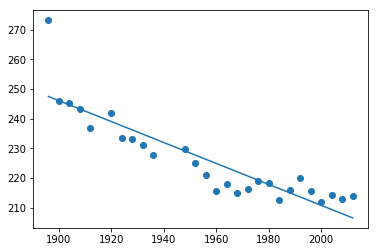

In [96]:

predictions = model_with_outlier.predict(X)
plt.scatter(Olympics['Year'], Olympics['Time'])
# plt.plot(X['Year'], predictions)
plt.plot(X['Year'], [ 916.4323 - 0.3528*i for i in X['Year']])
plt.show()

### Effect of outlier on model

ValueError: shapes (1,26) and (2,) not aligned: 26 (dim 1) != 2 (dim 0)